<a href="https://colab.research.google.com/github/Shaitender/TextExtraction/blob/master/FastText_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fasttext

     |████████████████████████████████| 61kB 7.9MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2379736 sha256=d006c07d79b735e40858e12cfc5b91b1dc085af637df610e6ad720546df502db
  Stored in directory: /root/.cache/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [6]:
import pandas as pd
datesDf = pd.read_excel('/content/Effective Date Option Dataset.xlsx')
datesDf.head()

,Effective Date Options,String
0,Later of the two signatures,the â€œagreementâ€) is entered into as of the...
1,Specific Date,llc contractor: globallogic inc. -docusigned b...
2,Specific Date,your acceptance of the above by signing and r...
3,NO MATCH,your acceptance of the above by signing and r...
4,Specific Date,your acceptance of the above by signing and r...


In [8]:
#drop NoMatch rows
datesDf.drop(datesDf[datesDf['Effective Date Options'].apply(lambda x: x.startswith('NO MATCH'))].index, inplace=True)
datesDf.drop(datesDf[datesDf['String'].apply(lambda x: x.startswith('NO MATCH'))].index, inplace=True)

#lower label
datesDf['Effective Date Options']= datesDf['Effective Date Options'].str.lower()


#drop dublicates
datesDf.drop_duplicates(subset=['Effective Date Options', 'String'], keep=False)

,Effective Date Options,String
0,later of the two signatures,the â€œagreementâ€) is entered into as of the...
1,specific date,llc contractor: globallogic inc. -docusigned b...
2,specific date,your acceptance of the above by signing and r...
4,specific date,your acceptance of the above by signing and r...
5,later of the two signatures,of the above by signing and returning the enc...
6,specific date,your acceptance of the above by signing and r...
7,later of the two signatures,your acceptance of the above by signing and r...
8,specific date,docusign envelope id: 588c2cfa-2cb0-45da-ad22-...
9,specific date,ala.kc@tcs.com google project manager: erbil y...
10,specific date,bala.kc@tcs.com google project manager: minha...


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

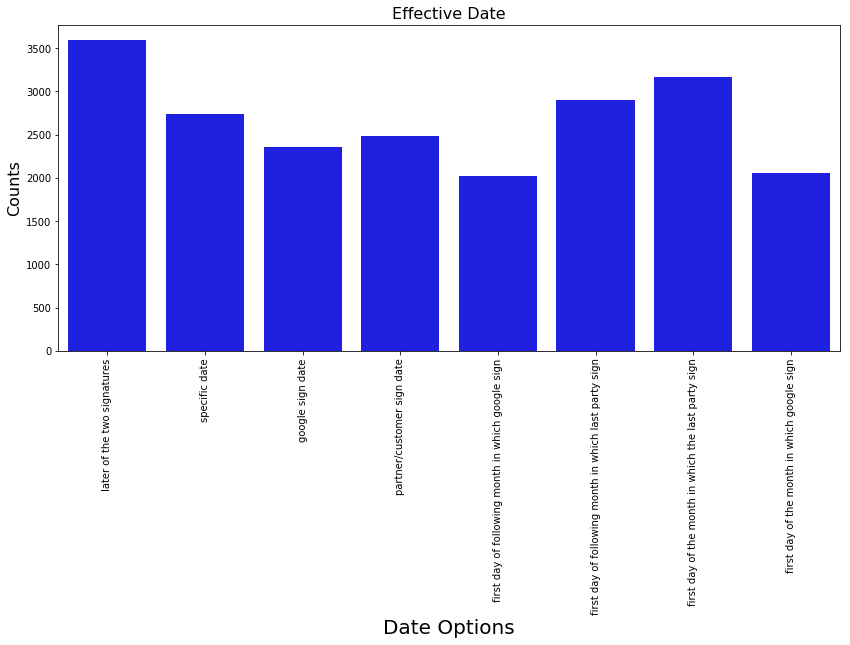

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.countplot(x=datesDf['Effective Date Options'], color='blue')
plt.title('Effective Date', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Date Options', fontsize=20)
plt.xticks(rotation='vertical')

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

def preProcessing(text):
    text = text.lower().replace('[^\w\s]','')
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
datesDf['String'] = datesDf['String'].apply(preProcessing)


datesDf.drop(['Effective Date Options'], axis=1)

#suffle data 
datesDf = datesDf.sample(frac=1).reset_index(drop=True)




In [0]:
#save procressed data set
datesDf.to_csv('effectivedate_procressed_without_header.csv', index=False,header=False)

In [0]:
import fasttext as ft
 
model = ft.train_unsupervised('/content/effectivedate_procressed_without_header.csv','skipgram', epoch=1, lr=0.5)

In [17]:
print(model.words)


[',', ':', 'google', ')', '(', '</s>', 'effective', 'month', 'first', 'date', 'day', '.', 'of', 'company', 'the', 'agreement', 'following', 'in', 'which', 'party', 'may', 'last', '``', 'signature', 'dateâ€\x9d', 'notice', 'information', '30', 'billing', 'prior', 'table', 'amend', 'sign', 'provided', 'addendum', 'amendment', '@', 'may"', 'â€œsow', 'two', 'later', "''", "'", 'daysâ€™', 'entered', "'s", 'signed', 'specific', '1', 'days', 'doubleclick', 'id', 'partner/customer', 'publisher', 'â€œeffective', 'data-sharing', 'currency', 'term', 'ireland', 'order', 'extension', 'google.com', 'x', 'form', '2019', 'email', 'parties', 'partner', 'llc', '1st', 'manager', 'pdt-us/pacific', 'end', 'project', 'legal', 'calendar', 'limited', 'services', 'block', 'affiliate', 'name', '3.', 'sow', 'terms', 'payments', 'adopting', 'accept', 'â€œagreementâ€\x9d', 'unless', 'amendmentâ€\x9d', 'agree', 'contract', 'termâ€\x9d', 'revenue', 'share', 'terminated', 'sign,"ic', 'â€œaddendumâ€\x9d', 'us', 'click

In [18]:
model.get_labels('google')

([',',
  ':',
  'google',
  ')',
  '(',
  '</s>',
  'effective',
  'month',
  'first',
  'date',
  'day',
  '.',
  'of',
  'company',
  'the',
  'agreement',
  'following',
  'in',
  'which',
  'party',
  'may',
  'last',
  '``',
  'signature',
  'dateâ€\x9d',
  'notice',
  'information',
  '30',
  'billing',
  'prior',
  'table',
  'amend',
  'sign',
  'provided',
  'addendum',
  'amendment',
  '@',
  'may"',
  'â€œsow',
  'two',
  'later',
  "''",
  "'",
  'daysâ€™',
  'entered',
  "'s",
  'signed',
  'specific',
  '1',
  'days',
  'doubleclick',
  'id',
  'partner/customer',
  'publisher',
  'â€œeffective',
  'data-sharing',
  'currency',
  'term',
  'ireland',
  'order',
  'extension',
  'google.com',
  'x',
  'form',
  '2019',
  'email',
  'parties',
  'partner',
  'llc',
  '1st',
  'manager',
  'pdt-us/pacific',
  'end',
  'project',
  'legal',
  'calendar',
  'limited',
  'services',
  'block',
  'affiliate',
  'name',
  '3.',
  'sow',
  'terms',
  'payments',
  'adopting',
  'a

In [23]:
model.get_word_vector('google')

array([ 6.14903030e+10,  1.74971412e+10, -1.58537728e+10,  6.96588339e+09,
       -1.55840922e+10,  5.76512000e+10, -2.47771095e+10, -7.08085094e+09,
       -4.97081600e+09, -3.86809692e+10, -1.58171315e+09,  2.78625649e+10,
        2.54482473e+10,  5.48524237e+10, -1.51233034e+10, -5.82802555e+10,
       -1.86888397e+10,  4.49572495e+10, -1.60521779e+10, -1.92985784e+10,
       -1.83685202e+10,  3.97853491e+09, -5.44018760e+10,  2.72470323e+10,
        7.99498701e+09, -3.53081098e+10, -3.52977019e+10,  1.80488622e+10,
       -1.40894116e+10,  4.43140219e+10,  3.56576128e+09,  2.74825892e+10,
        3.25695427e+10,  2.39637555e+09, -3.37688115e+09,  2.87737426e+10,
       -4.48628285e+10, -3.61066496e+10, -2.04844134e+10, -2.10574316e+10,
       -2.84838400e+10, -1.12938639e+10,  7.31533210e+09, -1.75849062e+10,
       -7.19055585e+10, -5.14861629e+10,  7.89566528e+08,  3.36771011e+10,
       -2.41684910e+10, -9.93808998e+09, -1.46258678e+10,  7.61653862e+09,
       -1.59685622e+10,  